## 6.4 Machine Learning Part 1


### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'C:\Users\Martin ARAUJO\Documents\US Regional Sales Data'

In [5]:
# Import the Data Frame

df = pd.read_pickle(os.path.join(path, '02- Data', 'Prepared Data', 'DF_clean.pkl'))

In [6]:
# Display of all columns in the dataset
pd.set_option('display.max_columns', None)

In [7]:
df.head(1)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population


### 2. Data prep for regression analysis 

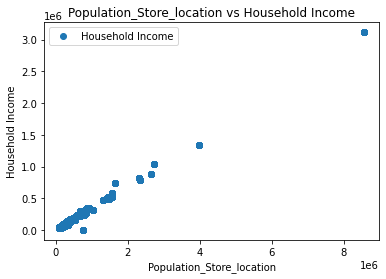

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Population_Store_location', y='Household Income',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Population_Store_location vs Household Income')  
plt.xlabel('Population_Store_location')  
plt.ylabel('Household Income')  
plt.show()

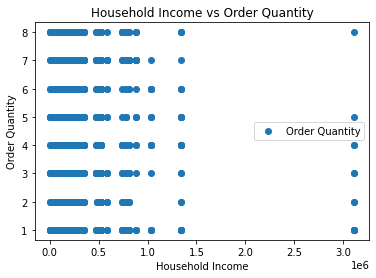

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Household Income', y='Order Quantity',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Household Income vs Order Quantity')  
plt.xlabel('Household Income')  
plt.ylabel('Order Quantity')  
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Population_Store_location'].values.reshape(-1,1)
y = df['Household Income'].values.reshape(-1,1)

In [21]:
X

array([[213776],
       [258071],
       [213776],
       ...,
       [600155],
       [352769],
       [197992]], dtype=int64)

In [22]:
y

array([[ 68789],
       [110549],
       [ 68789],
       ...,
       [230807],
       [127177],
       [ 79902]], dtype=int64)

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression analysis

In [24]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

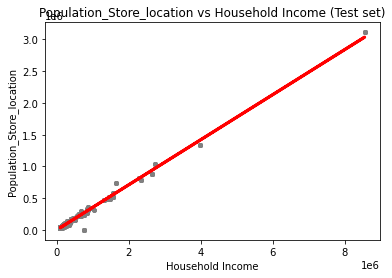

In [35]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Population_Store_location vs Household Income (Test set)')
plot_test.xlabel('Household Income')
plot_test.ylabel('Population_Store_location')
plot_test.show()

In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.35516634]]
Mean squared error:  490668535.3340377
R2 score:  0.9895134420418411


In [38]:
y_predicted

array([[ 66235.89901269],
       [ 36691.03225485],
       [ 46742.23954029],
       ...,
       [ 61353.42740304],
       [143738.16567648],
       [ 40086.77758545]])

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,81073,66235.899013
1,33375,36691.032255
2,53328,46742.239540
3,47427,57645.135697
4,88476,81614.246159
5,72760,71665.681945
6,39448,36481.839283
7,79026,74282.902669
8,41474,38351.079705
9,50073,52671.741506


##### Compare how the regression fits the training set

In [40]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.35516634]]
Mean squared error:  485198609.72654426
R2 score:  0.9835251800017457


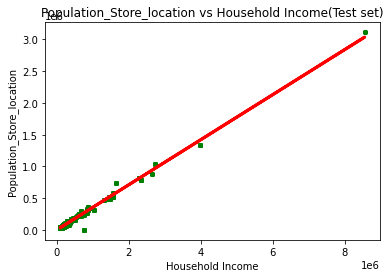

In [44]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Population_Store_location vs Household Income(Test set)')
plot_test.xlabel('Household Income')
plot_test.ylabel('Population_Store_location')
plot_test.show()

In our dataset, we don't have enough variables witha strong correlation (either negative or positive). The only stron correlation is between Household Income and Population of states.

The slope is a coefficient that shows how the y variable changes when X changes. In our case, we have a positive slope, which indicates a positive relationship (as X rises, so does y) at a rate of 0.35.

The root mean squared error (MSE) is an estimator that measures how close a regression line is to a set of points. The larger the distance, the farther away the regression line is from the data points, indicating that the regression line isn’t an accurate representation of the data. In our example, we have a value of 485.198.609, so the regression may not be the best model to represent this data and can’t accurately predict the influence of Household income by population size.

The R2 score for the model is 0.98, indicating that the model is working fine, so maybe there are some outliers that need to be fixed to adjust the root mean squared error.

In [45]:
df['Household Income'].min()

0

In [46]:
df['Household Income'].max()

3113535

In [47]:
df['Household Income'].mean()

104820.15767738706

In [55]:
 df[df['Household Income'] > 1000000]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type
53,SO - 0007093,In-Store,WARE-XYS1001,2020-06-18,2020-09-06,2020-10-03,2020-10-13,USD,6,0.075,241.2,120.600,Select,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Floral,California,West,Joshua Bennett,Northeast,High_population
287,SO - 0006339,In-Store,WARE-NMK1003,2020-03-10,2020-06-07,2020-07-01,2020-07-04,USD,6,0.100,2881.0,2362.420,Capweld,Chicago,Cook County/DuPage County,IL,Illinois,City,41.83755,-87.68184,773,2720546,1035436,48522,588808396,17615206,America/Chicago,Cocktail Glasses,Illinois,Midwest,Keith Griffin,Northeast,High_population
312,SO - 0005121,In-Store,WARE-XYS1001,2019-12-01,2020-01-16,2020-01-21,2020-01-23,USD,2,0.075,5681.6,4090.752,Dharma Ltd,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Cookware,California,West,Keith Griffin,Northeast,High_population
530,SO - 0005855,Online,WARE-NMK1003,2019-12-01,2020-04-12,2020-04-25,2020-04-30,USD,7,0.050,3899.4,2456.622,"3LAB, Ltd",Chicago,Cook County/DuPage County,IL,Illinois,City,41.83755,-87.68184,773,2720546,1035436,48522,588808396,17615206,America/Chicago,Dining Furniture,Illinois,Midwest,Roger Alexander,Midwest,High_population
575,SO - 0004282,Online,WARE-XYS1001,2019-05-15,2019-10-09,2019-10-23,2019-10-25,USD,3,0.050,2284.7,1941.995,Apollo Ltd,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Stemware,California,West,Roger Alexander,Midwest,High_population
601,SO - 0006587,Online,WARE-XYS1001,2020-03-10,2020-07-08,2020-08-03,2020-08-12,USD,1,0.075,194.3,110.751,21st Ltd,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Collectibles,California,West,Roger Alexander,Midwest,High_population
605,SO - 000288,Online,WARE-XYS1001,2018-04-10,2018-06-22,2018-07-12,2018-07-21,USD,2,0.050,1118.9,749.663,Qualitest,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Wreaths,California,West,Roger Alexander,Midwest,High_population
867,SO - 0002952,Online,WARE-XYS1001,2019-02-04,2019-05-01,2019-05-13,2019-05-18,USD,5,0.150,1025.1,430.542,AuroMedics Corp,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Phones,California,West,Nicholas Cunningham,South,High_population
872,SO - 0006343,Online,WARE-XYS1001,2020-03-10,2020-06-08,2020-06-23,2020-07-01,USD,1,0.300,1869.3,1271.124,"Exact-Rx, Corp",Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Wreaths,California,West,Nicholas Cunningham,South,High_population
1194,SO - 0001129,Online,WARE-XYS1001,2018-07-19,2018-09-28,2018-10-23,2018-11-02,USD,8,0.400,5112.1,3271.744,Ohio,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Furniture Cushions,California,West,Shawn Wallace,South,High_population


In [59]:
 df[df['City_Name_Store_location'] == 'Los Angeles'].count()

OrderNumber                     25
Sales Channel                   25
WarehouseCode                   25
ProcuredDate                    25
OrderDate                       25
ShipDate                        25
DeliveryDate                    25
CurrencyCode                    25
Order Quantity                  25
Discount Applied                25
Unit Price                      25
Unit Cost                       25
Customer Names                  25
City_Name_Store_location        25
County_Store_location           25
StateCode_Store_location        25
State_x_Store_location          25
Type_Store_location             25
Latitude_Store_location         25
Longitude_Store_location        25
AreaCode_Store_location         25
Population_Store_location       25
Household Income                25
Median_Income_Store_location    25
Land_Area_Store_location        25
Water_Area_Store_location       25
Time_Zone_Store_location        25
Product Name                    25
State               

In [60]:
 df[df['City_Name_Store_location'] == 'Chicago'].count()

OrderNumber                     19
Sales Channel                   19
WarehouseCode                   19
ProcuredDate                    19
OrderDate                       19
ShipDate                        19
DeliveryDate                    19
CurrencyCode                    19
Order Quantity                  19
Discount Applied                19
Unit Price                      19
Unit Cost                       19
Customer Names                  19
City_Name_Store_location        19
County_Store_location           19
StateCode_Store_location        19
State_x_Store_location          19
Type_Store_location             19
Latitude_Store_location         19
Longitude_Store_location        19
AreaCode_Store_location         19
Population_Store_location       19
Household Income                19
Median_Income_Store_location    19
Land_Area_Store_location        19
Water_Area_Store_location       19
Time_Zone_Store_location        19
Product Name                    19
State               

In [61]:
 df[df['City_Name_Store_location'] == 'New York City'].count()

OrderNumber                     13
Sales Channel                   13
WarehouseCode                   13
ProcuredDate                    13
OrderDate                       13
ShipDate                        13
DeliveryDate                    13
CurrencyCode                    13
Order Quantity                  13
Discount Applied                13
Unit Price                      13
Unit Cost                       13
Customer Names                  13
City_Name_Store_location        13
County_Store_location           13
StateCode_Store_location        13
State_x_Store_location          13
Type_Store_location             13
Latitude_Store_location         13
Longitude_Store_location        13
AreaCode_Store_location         13
Population_Store_location       13
Household Income                13
Median_Income_Store_location    13
Land_Area_Store_location        13
Water_Area_Store_location       13
Time_Zone_Store_location        13
Product Name                    13
State               

In [67]:
DF_subset = df.loc[df['City_Name_Store_location'].isin(['Los Angeles','Chicago','New York City'])]

In [69]:
DF_subset.count()

OrderNumber                     57
Sales Channel                   57
WarehouseCode                   57
ProcuredDate                    57
OrderDate                       57
ShipDate                        57
DeliveryDate                    57
CurrencyCode                    57
Order Quantity                  57
Discount Applied                57
Unit Price                      57
Unit Cost                       57
Customer Names                  57
City_Name_Store_location        57
County_Store_location           57
StateCode_Store_location        57
State_x_Store_location          57
Type_Store_location             57
Latitude_Store_location         57
Longitude_Store_location        57
AreaCode_Store_location         57
Population_Store_location       57
Household Income                57
Median_Income_Store_location    57
Land_Area_Store_location        57
Water_Area_Store_location       57
Time_Zone_Store_location        57
Product Name                    57
State               

In [74]:
df_subset2 = df.drop(df[(df.City_Name_Store_location == 'Los Angeles')].index)

In [76]:
df_subset3 = df_subset2.drop(df_subset2[(df_subset2.City_Name_Store_location == 'Chicago')].index)

In [77]:
df_subset4 = df_subset3.drop(df_subset3[(df_subset3.City_Name_Store_location == 'New York City')].index)

In [78]:
df_subset4

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population
1,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,5,0.050,1909.5,954.750,New Ltd,Buffalo,Erie County,NY,New York,City,42.88645,-78.87837,716,258071,110549,31918,104592941,31362925,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population
2,SO - 0006713,In-Store,WARE-UHY1004,2020-03-10,2020-07-21,2020-08-15,2020-08-16,USD,3,0.075,2492.4,1246.200,"Fenwal, Corp",Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Computers,New York,Northeast,Joshua Bennett,Northeast,Low_population
3,SO - 0006843,In-Store,WARE-PUJ1005,2020-03-10,2020-08-06,2020-08-14,2020-08-17,USD,3,0.100,3932.9,2084.437,OHTA'S Corp,Staten Island,Richmond County,NY,New York,Borough,40.57628,-74.14484,718,474558,156341,55039,152000000,110000000,America/New York,Basketball,New York,Northeast,Joshua Bennett,Northeast,High_population
4,SO - 0005035,In-Store,WARE-UHY1004,2019-08-23,2020-01-08,2020-01-15,2020-01-21,USD,3,0.150,1755.4,1298.996,Niconovum Corp,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Cookware,New York,Northeast,Joshua Bennett,Northeast,Low_population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0006605,Online,WARE-MKL1006,2020-03-10,2020-07-10,2020-08-01,2020-08-07,USD,5,0.100,2706.8,1786.488,Capweld,Milwaukee,Milwaukee County/Washington County/Waukesha Co...,WI,Wisconsin,City,43.06335,-87.96670,414,600155,230807,35958,249128870,1720458,America/Chicago,Serveware,Wisconsin,Midwest,Anthony Torres,West,High_population
7987,SO - 0002504,Online,WARE-MKL1006,2018-10-27,2019-03-08,2019-03-23,2019-03-29,USD,3,0.150,1976.5,790.600,Capweld,Green Bay,Brown County,WI,Wisconsin,City,44.51916,-88.01983,920,105207,42308,42826,117673093,27054147,America/Chicago,Vanities,Wisconsin,Midwest,Anthony Torres,West,Low_population
7988,SO - 0001226,Distributor,WARE-MKL1006,2018-07-19,2018-10-12,2018-10-21,2018-10-27,USD,7,0.400,2505.8,2079.814,Ohio,Milwaukee,Milwaukee County/Washington County/Waukesha Co...,WI,Wisconsin,City,43.06335,-87.96670,414,600155,230807,35958,249128870,1720458,America/Chicago,Outdoor Decor,Wisconsin,Midwest,Anthony Torres,West,High_population
7989,SO - 0004190,Online,WARE-NMK1003,2019-05-15,2019-09-28,2019-10-13,2019-10-16,USD,6,0.050,3946.3,2249.391,Eminence Corp,Honolulu,Honolulu County,HI,Hawaii,CDP,21.32435,-157.84764,808,352769,127177,61442,156812572,20481895,Pacific/Honolulu,Rugs,Hawaii,West,Anthony Torres,West,High_population


7934+57 = 7991 .   Extreme values deleted: ok

In [92]:
 df_subset4[df_subset4['Household Income'] > 1000000]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type


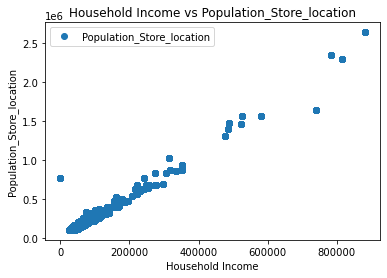

In [79]:
# See how the scatterplot looks without outliers.

df_subset4.plot(x = 'Household Income', y='Population_Store_location', style='o')  
plt.title('Household Income vs Population_Store_location')  
plt.xlabel('Household Income')  
plt.ylabel('Population_Store_location')  
plt.show()

In [82]:
# Reshape again.

X_2 = df_subset4['Household Income'].values.reshape(-1,1)
y_2 = df_subset4['Population_Store_location'].values.reshape(-1,1)

In [96]:
X_2

array([[ 68789],
       [110549],
       [ 68789],
       ...,
       [230807],
       [127177],
       [ 79902]], dtype=int64)

In [97]:
y_2

array([[213776],
       [258071],
       [213776],
       ...,
       [600155],
       [352769],
       [197992]], dtype=int64)

In [83]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [84]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [85]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [86]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [87]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.7289327]]
Mean squared error:  3114696632.8308086
R2 score:  0.9670330563544476


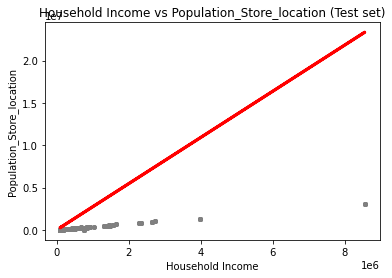

In [88]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Household Income vs Population_Store_location (Test set)')
plot_test.xlabel('Household Income')
plot_test.ylabel('Population_Store_location')
plot_test.show()

In [89]:
data = pd.DataFrame({'Actual': y_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

ValueError: All arrays must be of the same length

The model doesn't seem to be working better deleting the extreme values. Indeed, it is not possible to check the actual values vs predicted values, as the lenght of the arrays must be exactly the same.  Also the regression line is far away from the datapoints after deleting the extreme values.

In general, we know that the biggest the population is, the bigger is the household income, but with this model we cannot predict in a perfect way which is going to be the household income for a given population size.